<a href="https://colab.research.google.com/github/pajonnakuti/pyDataviz/blob/main/code/XArray_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**What is Xarray?**

Xarray is a Python library designed to handle multi-dimensional labeled arrays, offering a streamlined way to work with data that extends beyond the capabilities of Numpy and Pandas.

**Key Features**

1.   Labeled dimensions and coordinates
2.   Efficient groupby, resampling, and aggregation operations
3. Compatibility with popular scientific Python libraries like Pandas and Numpy

**Xarray fundamentals: DataAarray & Dataset**

**DataArray**

The basic building block of Xarray, similar to Numpy arrays but with labels for dimensions, coordinates, and attributes.

In [1]:
import xarray as xr
import numpy as np
import pandas as pd

data = np.random.randn(10)
time = pd.date_range("2023-01-01", periods=10)
data_array = xr.DataArray(data, coords=[time], dims=["time"])
print(data_array)

<xarray.DataArray (time: 10)> Size: 80B
array([ 0.16737732,  0.36867804,  0.23463986,  0.72036732, -1.26591968,
        0.25805993,  0.7056688 , -1.14842093,  0.95284905,  1.65535047])
Coordinates:
  * time     (time) datetime64[ns] 80B 2023-01-01 2023-01-02 ... 2023-01-10


In [3]:
time
data_array

<xarray.DataArray (time: 10)> Size: 80B
array([ 0.16737732,  0.36867804,  0.23463986,  0.72036732, -1.26591968,
        0.25805993,  0.7056688 , -1.14842093,  0.95284905,  1.65535047])
Coordinates:
  * time     (time) datetime64[ns] 80B 2023-01-01 2023-01-02 ... 2023-01-10

**Dataset**

A dictionary-like container that maps variable names to DataArrays, ideal for working with multiple variables.

In [4]:
ds = xr.Dataset({
    "air": data_array,
    "temperature": xr.DataArray(np.random.randn(10), dims=["time"], coords={"time": time})
})

# Add latitude and longitude coordinates
lat = np.arange(10, 20)  # Example latitude values
lon = np.arange(80, 90)  # Example longitude values
ds = ds.assign_coords(lat=('time', lat), lon=('time', lon))

print(ds)

<xarray.Dataset> Size: 400B
Dimensions:      (time: 10)
Coordinates:
  * time         (time) datetime64[ns] 80B 2023-01-01 2023-01-02 ... 2023-01-10
    lat          (time) int64 80B 10 11 12 13 14 15 16 17 18 19
    lon          (time) int64 80B 80 81 82 83 84 85 86 87 88 89
Data variables:
    air          (time) float64 80B 0.1674 0.3687 0.2346 ... -1.148 0.9528 1.655
    temperature  (time) float64 80B -0.1891 0.6918 -0.8701 ... 0.2499 1.823


In [5]:
# Attributes
ds.attrs = {"source": "weather dataset", "description": "temperature data"}
print(ds.attrs)

{'source': 'weather dataset', 'description': 'temperature data'}


**Indexing and Selecting Data**

In [6]:
#Label-based indexing with .sel

ds.sel(time="2023-01-01")
ds.sel(time=slice("2023-01-01", "2023-01-05"))

<xarray.Dataset> Size: 200B
Dimensions:      (time: 5)
Coordinates:
  * time         (time) datetime64[ns] 40B 2023-01-01 2023-01-02 ... 2023-01-05
    lat          (time) int64 40B 10 11 12 13 14
    lon          (time) int64 40B 80 81 82 83 84
Data variables:
    air          (time) float64 40B 0.1674 0.3687 0.2346 0.7204 -1.266
    temperature  (time) float64 40B -0.1891 0.6918 -0.8701 -0.6596 0.1732
Attributes:
    source:       weather dataset
    description:  temperature data

In [7]:
#Position-based indexing with .isel
ds.isel(time=0)

<xarray.Dataset> Size: 40B
Dimensions:      ()
Coordinates:
    time         datetime64[ns] 8B 2023-01-01
    lat          int64 8B 10
    lon          int64 8B 80
Data variables:
    air          float64 8B 0.1674
    temperature  float64 8B -0.1891
Attributes:
    source:       weather dataset
    description:  temperature data

In [8]:
#Boolean Indexing & Masking:
ds.temperature.where(ds.temperature > 0, drop=True)

<xarray.DataArray 'temperature' (time: 5)> Size: 40B
array([0.69176917, 0.17323469, 0.96241601, 0.24987881, 1.8230408 ])
Coordinates:
  * time     (time) datetime64[ns] 40B 2023-01-02 2023-01-05 ... 2023-01-10
    lat      (time) int64 40B 11 14 16 18 19
    lon      (time) int64 40B 81 84 86 88 89

In [9]:
#Nearest Neighbor Lookup: With tolerance to limit the distance of inexact lookups
ds.sel(lat=11, lon=80, method="nearest", tolerance=0.1)

KeyError: "no index found for coordinate 'lat'"

In [10]:
#Dimensions (.dims): Dimensions correspond to the axes of your data

ds.temperature.dims  # ('time', 'lat', 'lon')

('time',)

In [11]:
#Coordinates (.coords): Coordinates map dimension names to values

ds.coords

Coordinates:
  * time     (time) datetime64[ns] 80B 2023-01-01 2023-01-02 ... 2023-01-10
    lat      (time) int64 80B 10 11 12 13 14 15 16 17 18 19
    lon      (time) int64 80B 80 81 82 83 84 85 86 87 88 89

In [12]:
#Reduction: Aggregation operations that reduce the dimensions of the dataset

ds.temperature.mean(dim="time")

<xarray.DataArray 'temperature' ()> Size: 8B
array(-0.01769216)

In [13]:
#Groupby Operations: Xarray enables split-apply-combine workflows

ds.groupby("time.month").mean()

<xarray.Dataset> Size: 24B
Dimensions:      (month: 1)
Coordinates:
  * month        (month) int64 8B 1
Data variables:
    air          (month) float64 8B 0.2649
    temperature  (month) float64 8B -0.01769
Attributes:
    source:       weather dataset
    description:  temperature data

In [14]:
ds.resample(time="M").mean()

/usr/local/lib/python3.12/dist-packages/xarray/groupers.py:530: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


<xarray.Dataset> Size: 24B
Dimensions:      (time: 1)
Coordinates:
  * time         (time) datetime64[ns] 8B 2023-01-31
Data variables:
    air          (time) float64 8B 0.2649
    temperature  (time) float64 8B -0.01769
Attributes:
    source:       weather dataset
    description:  temperature data

In [15]:
ds.rolling(time=3).mean()

<xarray.Dataset> Size: 400B
Dimensions:      (time: 10)
Coordinates:
  * time         (time) datetime64[ns] 80B 2023-01-01 2023-01-02 ... 2023-01-10
    lat          (time) int64 80B 10 11 12 13 14 15 16 17 18 19
    lon          (time) int64 80B 80 81 82 83 84 85 86 87 88 89
Data variables:
    air          (time) float64 80B nan nan 0.2569 ... -0.06156 0.17 0.4866
    temperature  (time) float64 80B nan nan -0.1225 ... -0.4653 -0.1976 0.08924
Attributes:
    source:       weather dataset
    description:  temperature data

In [16]:
#Broadcasting: Xarray can automatically broadcast arrays with different shapes before applying operations

ds.temperature + ds.air

<xarray.DataArray (time: 10)> Size: 80B
array([-0.02175942,  1.0604472 , -0.63545162,  0.06078367, -1.09268499,
       -0.29518187,  1.66808481, -2.95362834,  1.20272786,  3.47839127])
Coordinates:
  * time     (time) datetime64[ns] 80B 2023-01-01 2023-01-02 ... 2023-01-10
    lat      (time) int64 80B 10 11 12 13 14 15 16 17 18 19
    lon      (time) int64 80B 80 81 82 83 84 85 86 87 88 89

In [ ]:
#Apply Ufunc: Apply a Numpy function to an Xarray object while preserving its coordinates

xr.apply_ufunc(np.nan_to_num, ds.temperature, kwargs={"nan": 0})

<xarray.DataArray 'temperature' (time: 10)> Size: 80B
array([ 0.38192116, -0.82196738,  0.10590651, -1.57137119, -0.78099275,
       -0.75688648,  0.66007927,  0.23962604,  0.6606777 ,  0.54218261])
Coordinates:
  * time     (time) datetime64[ns] 80B 2023-01-01 2023-01-02 ... 2023-01-10
    lat      (time) int64 80B 10 11 12 13 14 15 16 17 18 19
    lon      (time) int64 80B 80 81 82 83 84 85 86 87 88 89

In [17]:
#Saving Datasets: You can save a dataset or DataArray to a file

ds.to_netcdf("my_data.nc")

In [18]:
#Loading Data: Load the dataset or DataArray
xr.open_dataset("my_data.nc")

<xarray.Dataset> Size: 400B
Dimensions:      (time: 10)
Coordinates:
  * time         (time) datetime64[ns] 80B 2023-01-01 2023-01-02 ... 2023-01-10
    lat          (time) int64 80B ...
    lon          (time) int64 80B ...
Data variables:
    air          (time) float64 80B ...
    temperature  (time) float64 80B ...
Attributes:
    source:       weather dataset
    description:  temperature data

In [19]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 75.3 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


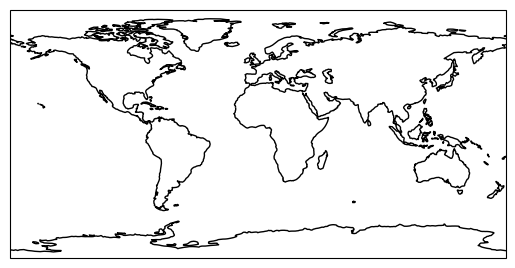

In [20]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

plt.show()

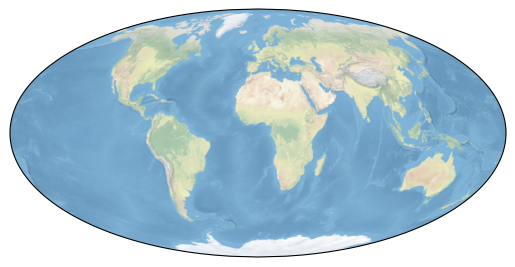

In [21]:
ax = plt.axes(projection=ccrs.Mollweide())
ax.stock_img()
plt.show()

**Adding sample Data to the map**

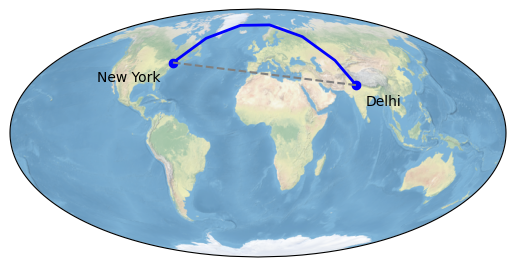

In [23]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.Mollweide())
ax.stock_img()

ny_lon, ny_lat = -75, 43
delhi_lon, delhi_lat = 77.23, 28.61

plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
         color='blue', linewidth=2, marker='o',
         transform=ccrs.Geodetic(),
         )

plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
         color='gray', linestyle='--',
         transform=ccrs.PlateCarree(),
         )

plt.text(ny_lon - 3, ny_lat - 12, 'New York',
         horizontalalignment='right',
         transform=ccrs.Geodetic())

plt.text(delhi_lon + 3, delhi_lat - 12, 'Delhi',
         horizontalalignment='left',
         transform=ccrs.Geodetic())

plt.show()

In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# Define ranges
lat_min, lat_max = -30, 30
lon_min, lon_max = 30, 110


In [31]:
print([lat_min,lat_max])
print([lon_min,lon_max])


[-30, 30]
[30, 110]


In [27]:
# Resolution (you can change step size, e.g., 1deg or 0.5deg)
lat_step = 1
lon_step = 1

In [42]:
# Create lat and lon arrays
lats = np.arange(lat_min, lat_max+ lat_step , lat_step)
lons = np.arange(lon_min, lon_max+lon_step , lon_step)

In [43]:
print(lats)
print(lons)

[-30 -29 -28 -27 -26 -25 -24 -23 -22 -21 -20 -19 -18 -17 -16 -15 -14 -13
 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5
   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22  23
  24  25  26  27  28  29  30]
[ 30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47
  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110]


In [44]:
# Create meshgrid
lon_grid, lat_grid = np.meshgrid(lons, lats)

In [45]:
print(lon_grid)
print(lat_grid)

[[ 30  31  32 ... 108 109 110]
 [ 30  31  32 ... 108 109 110]
 [ 30  31  32 ... 108 109 110]
 ...
 [ 30  31  32 ... 108 109 110]
 [ 30  31  32 ... 108 109 110]
 [ 30  31  32 ... 108 109 110]]
[[-30 -30 -30 ... -30 -30 -30]
 [-29 -29 -29 ... -29 -29 -29]
 [-28 -28 -28 ... -28 -28 -28]
 ...
 [ 28  28  28 ...  28  28  28]
 [ 29  29  29 ...  29  29  29]
 [ 30  30  30 ...  30  30  30]]


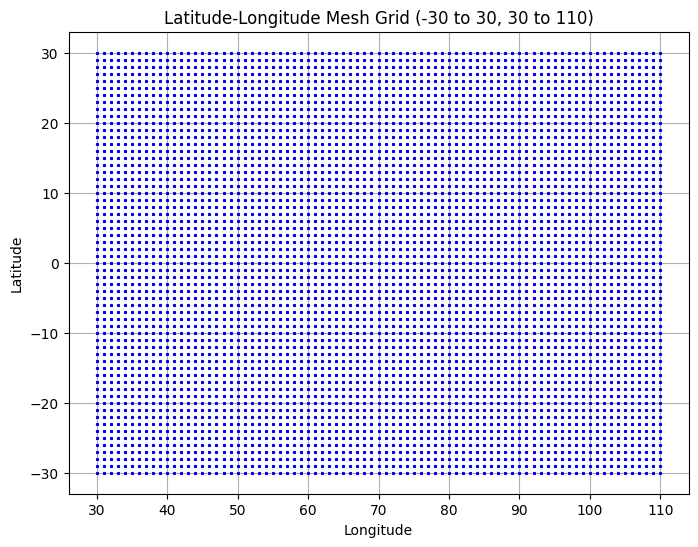

In [49]:
# === Plot mesh grid ===
plt.figure(figsize=(8,6))
plt.plot(lon_grid, lat_grid, 'b*', markersize=2)   # points
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Latitude-Longitude Mesh Grid (-30 to 30, 30 to 110)")
plt.grid(True)
plt.show()

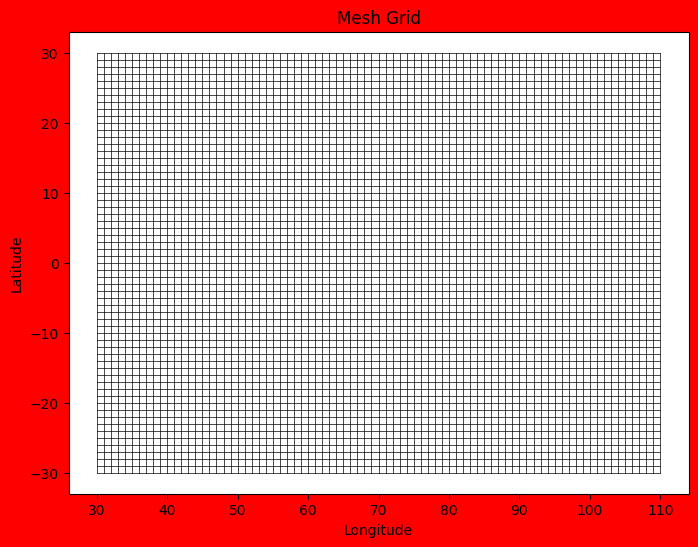

In [51]:
# mesh with grid lines
plt.figure(figsize=(8,6),facecolor='Red')
plt.plot(lon_grid, lat_grid, 'k-', linewidth=0.5)   # horizontal lines
plt.plot(lon_grid.T, lat_grid.T, 'k-', linewidth=0.5) # vertical lines
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Mesh Grid")
plt.show()

